In [13]:
import pandas as pd
import seaborn as seaborn
import matplotlib.pyplot as plot
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

In [6]:
train_df = pd.read_csv('./data/train.tsv', sep='\t')

In [7]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


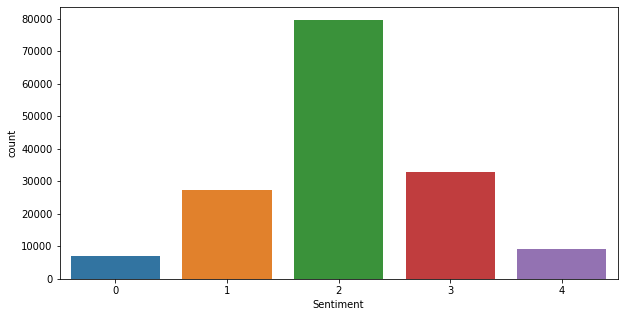

In [8]:
figure = plot.figure(figsize=(10, 5))
seaborn.countplot(data=train_df, x='Sentiment')
plot.show()

In [9]:
def get_count():
    s0 = train_df[train_df.Sentiment == 0].Sentiment.count()
    s1 = train_df[train_df.Sentiment == 1].Sentiment.count()
    s2 = train_df[train_df.Sentiment == 2].Sentiment.count()
    s3 = train_df[train_df.Sentiment == 3].Sentiment.count()
    s4 = train_df[train_df.Sentiment == 4].Sentiment.count()
    return s0, s1, s2, s3, s4

s0, s1, s2, s3, s4 = get_count()
print(s0, s1, s2, s3, s4)

df0 = s2 // s0 - 1
df1 = s2 // s1 - 1
df3 = s2 // s3 - 1
df4 = s2 // s4 - 1
 
train_df = train_df.append([train_df[train_df.Sentiment == 0]] * df0, ignore_index=True)
train_df = train_df.append([train_df[train_df.Sentiment == 1]] * df1, ignore_index=True)
train_df = train_df.append([train_df[train_df.Sentiment == 3]] * df3, ignore_index=True)
train_df = train_df.append([train_df[train_df.Sentiment == 4]] * df4, ignore_index=True)
train_df = train_df.append([train_df[train_df.Sentiment == 0][0 : s2 % s0]], ignore_index=True)
train_df = train_df.append([train_df[train_df.Sentiment == 1][0 : s2 % s1]], ignore_index=True)
train_df = train_df.append([train_df[train_df.Sentiment == 3][0 : s2 % s3]], ignore_index=True)
train_df = train_df.append([train_df[train_df.Sentiment == 4][0 : s2 % s4]], ignore_index=True)

s0, s1, s2, s3, s4 = get_count()
print(s0, s1, s2, s3, s4)

7072 27273 79582 32927 9206
79582 79582 79582 79582 79582


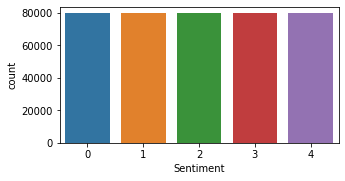

In [10]:
figure = plot.figure(figsize=(5, 2.5))
seaborn.countplot(data=train_df, x='Sentiment')
plot.show()

In [14]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raechellia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raechellia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

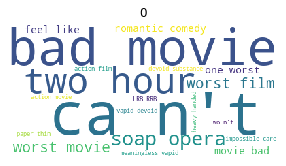

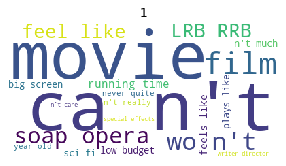

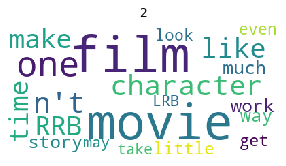

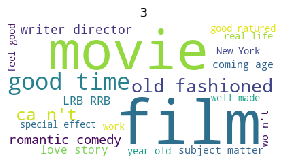

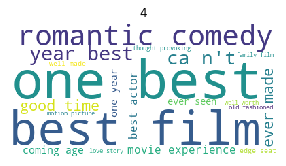

In [15]:
sentiments = [0, 1, 2, 3, 4]
cloud = WordCloud(background_color="white", max_words=20, stopwords=stopwords.words('english'))

def draw_word_clouds(dataframe):
    for i in sentiments: 
        category = cloud.generate(dataframe.loc[dataframe['Sentiment'] == i, 'Phrase'].str.cat(sep='\n'))
        plot.figure(figsize=(5, 2.5))
        plot.imshow(category)
        plot.axis("off")
        plot.title(i)
        plot.show()

draw_word_clouds(train_df)